In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [2]:
df_adjusted = pd.read_pickle('../Dataframes/daily_temp_gbg_save_adjusted.pkl')
df_original = pd.read_pickle('../Dataframes/df_daily_temp.pkl')

In [3]:
df_original['Month'] = df_original['Datum'].dt.month
df_original['Year'] = df_original['Datum'].dt.year
df_original['Day_of_year'] = df_original['Datum'].dt.day_of_year

In [4]:
df_adjusted['Month'] = df_adjusted['Datum'].dt.month
df_adjusted['Year'] = df_adjusted['Datum'].dt.year
df_adjusted['Day_of_year'] = df_adjusted['Datum'].dt.day_of_year

In [5]:
df_original['Under_0_5_days_in_a_row'] = 0
df_adjusted['Under_0_5_days_in_a_row'] = 0

In [ ]:
# Set the 'Under_0_5_days_in_a_row' column to show if temp has met that condition

for i in range(1, len(df_original)):
    if df_original['Snittemperatur'].iloc[i] <= 0:
        counter += 1
    else:
        counter = 0
        pass
    if counter == 5:
        df_original['Under_0_5_days_in_a_row'].iloc[i] = 1
        counter = 0
    else:
        pass

for i in range(1, len(df_adjusted)):
    if df_adjusted['Snittemperatur'].iloc[i] <= 0:
        counter += 1
    else:
        counter = 0
        pass
    if counter == 5:
        df_adjusted['Under_0_5_days_in_a_row'].iloc[i] = 1
        counter = 0
    else:
        pass

In [7]:
# Functions to extract the first winter day per year(season)
# Set to only look at dates after June. Otherwise temps from previous year might show up
# Years with no winter during the latter half will be marked as 15th sept.
# No actuatl winter days occured this early, and it will help making the graph look better.

def first_winter_day_original(year):
    for ind, val in df_original[(df_original['Year'] == year) & (df_original['Datum'].dt.month > 6) ].iterrows():
        if df_original['Under_0_5_days_in_a_row'][ind] == 1:
            first_summer_day = df_original['Datum'][ind-4]
            return first_summer_day
            break
        else:
            pass
    return None


def first_winter_day_adjusted(year):
    for ind, val in df_adjusted[(df_adjusted['Year'] == year) & (df_adjusted['Datum'].dt.month > 6) ].iterrows():
        if df_adjusted['Under_0_5_days_in_a_row'][ind] == 1:
            first_summer_day = df_adjusted['Datum'][ind-4]
            return first_summer_day
            break
        else:
            pass
    return None


In [8]:
# Create list of all results of the functions

winter_days_list_original = []
for i in range(1944, 2023):
    winter = first_winter_day_original(i)
    if winter == None:
        year = i
        month = 9
        day = 15
        date_str = f'{str(year)}-{str(month)}-{str(day)}'
        winter = pd.to_datetime(date_str)
    else:
        pass
    winter_days_list_original.append(winter)


winter_days_list_adjusted = []
for i in range(1944, 2023):
    winter = first_winter_day_adjusted(i)
    if winter == None:
        year = i
        month = 9
        day = 15
        date_str = f'{str(year)}-{str(month)}-{str(day)}'
        winter = pd.to_datetime(date_str)
    else:
        pass
    winter_days_list_adjusted.append(winter)

In [9]:
# Prepare for dataframe

years_original = []

for x, i in enumerate(winter_days_list_original):
    string = str(i.year)
    years_original.append(string)

months_original = []

for x, i in enumerate(winter_days_list_original):
    string = str(i.month)
    months_original.append(string)

days_original = []
for x, i in enumerate(winter_days_list_original):
    string = str(i.day)
    if len(string) < 2:
        string = f'0{string}'
    days_original.append(string)



years_adjusted = []

for x, i in enumerate(winter_days_list_adjusted):
    string = str(i.year)
    years_adjusted.append(string)

months_adjusted = []

for x, i in enumerate(winter_days_list_adjusted):
    string = str(i.month)
    months_adjusted.append(string)

days_adjusted = []
for x, i in enumerate(winter_days_list_adjusted):
    string = str(i.day)
    if len(string) < 2:
        string = f'0{string}'
    days_adjusted.append(string)


In [10]:
day_of_year_original = []
for i in winter_days_list_original:
    day_of_year_original.append(i.day_of_year)

day_of_year_adjusted = []
for i in winter_days_list_adjusted:
    day_of_year_adjusted.append(i.day_of_year)

In [11]:
df_first_winter_days_original = pd.DataFrame({'Year': years_original, 'Month': months_original, 
                                        'Day': days_original, 'day_of_year': day_of_year_original})

In [12]:
df_first_winter_days_adjusted = pd.DataFrame({'Year': years_adjusted, 'Month': months_adjusted, 
                                        'Day': days_adjusted, 'day_of_year': day_of_year_adjusted})

In [15]:
df_first_winter_days_original['Year'] = pd.to_numeric(df_first_winter_days_original['Year'])
df_first_winter_days_original['Month'] = pd.to_numeric(df_first_winter_days_original['Month'])
df_first_winter_days_original['Day'] = pd.to_numeric(df_first_winter_days_original['Day'])

In [16]:
df_first_winter_days_adjusted['Year'] = pd.to_numeric(df_first_winter_days_adjusted['Year'])
df_first_winter_days_adjusted['Month'] = pd.to_numeric(df_first_winter_days_adjusted['Month'])
df_first_winter_days_adjusted['Day'] = pd.to_numeric(df_first_winter_days_adjusted['Day'])

In [21]:
df_first_winter_days_original.to_pickle('../Dataframes/df_first_winter_days_original.pkl')

In [22]:
df_first_winter_days_adjusted.to_pickle('../Dataframes/df_first_winter_days_adjusted.pkl')

Prepare for the plot

In [29]:
df_first_winter_days_adjusted.sort_values(by='day_of_year')

,Year,Month,Day,day_of_year
62,2006,9,15,258
63,2007,9,15,258
30,1974,9,15,258
31,1975,9,15,258
33,1977,9,15,258
...,...,...,...,...
56,2000,12,23,358
70,2014,12,25,359
4,1948,12,24,359
20,1964,12,25,360


In [30]:
df_first_winter_days_original.sort_values(by='day_of_year')

,Year,Month,Day,day_of_year
62,2006,9,15,258
30,1974,9,15,258
31,1975,9,15,258
33,1977,9,15,258
67,2011,9,15,258
...,...,...,...,...
56,2000,12,23,358
70,2014,12,25,359
4,1948,12,24,359
20,1964,12,25,360


In [24]:
# Set first day
# Get rough idea about what day to start the plot

first_day = datetime(1944, 1, 1)
iss = first_day+timedelta(days=200)
iss

datetime.datetime(1944, 7, 19, 0, 0)

In [40]:
ticlist = [259, 275, 289, 306, 320, 335, 350]

In [41]:
datelist = []
for i in ticlist:
    datenum = first_day+timedelta(days=i-1)
    month = datenum.strftime('%m')
    day = datenum.strftime('%d')
    datelist.append(f'{month}-{day}')

In [47]:
dates_original = [int(i) for i in df_first_winter_days_original['day_of_year']]
years_original = [int(i) for i in df_first_winter_days_original['Year']]
dates_adjusted = [int(i) for i in df_first_winter_days_adjusted['day_of_year']]
years_adjusted = [int(i) for i in df_first_winter_days_adjusted['Year']]

In [42]:
datelist

['09-15', '10-01', '10-15', '11-01', '11-15', '11-30', '12-15']

In [45]:
colours = ['red' if value < 280 else 'blue' for value in dates_original]

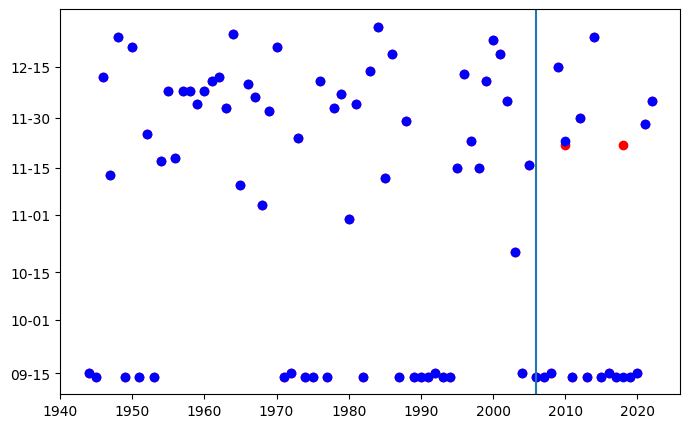

In [55]:
plt.figure(figsize=[8, 5])
plt.scatter(x=years_original, y=dates_original, c='r')
plt.scatter(x=years_adjusted, y=dates_adjusted, c='b')
plt.yticks(ticks=ticlist, labels=datelist)
plt.axvline(x=2006)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.show()

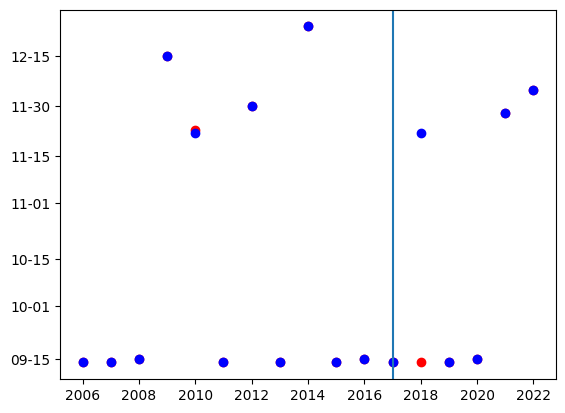

In [58]:
plt.figure

plt.scatter(x=df_first_winter_days_adjusted[df_first_winter_days_adjusted['Year'] > 2005]['Year'], 
            y=df_first_winter_days_adjusted[df_first_winter_days_adjusted['Year'] > 2005]['day_of_year'], c='r')
plt.scatter(x=df_first_winter_days_original[df_first_winter_days_original['Year'] > 2005]['Year'], 
            y=df_first_winter_days_original[df_first_winter_days_original['Year'] > 2005]['day_of_year'], c='b')
plt.axvline(x=2017)
plt.yticks(ticks=ticlist, labels=datelist)
plt.show()